# Notebook to Investigate $f_{1}(1285)\rightarrow a_{0}\pi$

In [2]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import my_library.common_analysis_tools as ct
import my_library.kinematic_cuts as kcuts
import my_library.constants as constants
import my_library.gluex_style

/usr/lib64/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
ROOT.gStyle.SetOptStat(0)
ROOT.EnableImplicitMT()

In [4]:
df_pipkmks = ct.get_dataframe('pipkmks', 'spring', 'data')
df_pimkpks = ct.get_dataframe('pimkpks', 'spring', 'data')

In [5]:
df_pipkmks = df_pipkmks.Define('kk_px', 'km_px + ks_px')
df_pipkmks = df_pipkmks.Define('kk_py', 'km_py + ks_py')
df_pipkmks = df_pipkmks.Define('kk_pz', 'km_pz + ks_pz')
df_pipkmks = df_pipkmks.Define('kk_E', 'km_E + ks_E')
df_pipkmks = df_pipkmks.Define('kk_m', 'sqrt(kk_E*kk_E - kk_px*kk_px - kk_py*kk_py - kk_pz*kk_pz)')

df_pimkpks = df_pimkpks.Define('kk_px', 'kp_px + ks_px')
df_pimkpks = df_pimkpks.Define('kk_py', 'kp_py + ks_py')
df_pimkpks = df_pimkpks.Define('kk_pz', 'kp_pz + ks_pz')
df_pimkpks = df_pimkpks.Define('kk_E', 'kp_E + ks_E')
df_pimkpks = df_pimkpks.Define('kk_m', 'sqrt(kk_E*kk_E - kk_px*kk_px - kk_py*kk_py - kk_pz*kk_pz)')

In [6]:
hist1d_kk_pipkmks = df_pipkmks.Histo1D(('kkm_pipkmks', 'M(K^{-}K_{S}) [GeV]', 60, 0.95, 1.35), 'kk_m')
hist1d_kk_pimkpks = df_pimkpks.Histo1D(('kkm_pimkpks', 'M(K^{+}K_{S}) [GeV]', 60, 0.95, 1.35), 'kk_m')
hist2d_kk_kkpi_pipkmks = df_pipkmks.Histo2D(('kk_kkpi_pipkmks', 'M(K^{-}K_{S}) vs M(K^{-}K_S}#pi^{+}) GeV', 50, 1.15, 1.45, 60, 0.95, 1.35), 'pipkmks_m', 'kk_m')
hist2d_kk_kkpi_pimkpks = df_pimkpks.Histo2D(('kk_kkpi_pimkpks', 'M(K^{+}K_{S}) vs M(K^{+}K_S}#pi^{-}) GeV', 50, 1.15, 1.45, 60, 0.95, 1.35), 'pimkpks_m', 'kk_m')
hist_kkpi_a0_pipkmks = df_pipkmks.Filter('kk_m <= 1.05').Histo1D(('a0_pipkmks_m', 'M(K^{#pm}K_{S}#pi^{#mp}) GeV', 50, 1.1, 1.6), 'pipkmks_m')
hist_kkpi_pipkmks = df_pipkmks.Histo1D(('pipkms_m', 'M(K^{#pm}K_{S}#pi^{#mp}) GeV', 50, 1.1, 1.6), 'pipkmks_m')
hist_kkpi_a0_pimkpks = df_pimkpks.Filter('kk_m <= 1.05').Histo1D(('a0_pimkpks_m', 'M(K^{#pm}K_{S}#pi^{#mp}) GeV', 50, 1.1, 1.6), 'pimkpks_m')
hist_kkpi_pimkpks = df_pimkpks.Histo1D(('pimkpks_m', 'M(K^{#pm}K_{S}#pi^{#mp}) GeV', 50, 1.1, 1.6), 'pimkpks_m')


# hist_kkpi_kstar_pipkmks = df_pipkmks.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS).Histo1D(('pipkmks_m', 'M(K^{#pm}K_{S}#pi^{#mp}) GeV', 60, 1.1, 1.7), 'pipkmks_m').GetValue()
# hist_kkpi_kstar_pimkpks = df_pimkpks.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS).Histo1D(('pimkpks_m', 'M(K^{#pm}K_{S}#pi^{#mp}) GeV', 60, 1.1, 1.7), 'pimkpks_m').GetValue()
# hist_kkpi_kstar_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.TWELVE_COLORBLIND_HEX_DICT['jungle green']))
# hist_kkpi_kstar_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.TWELVE_COLORBLIND_HEX_DICT['ruby red']))

df_pipkmks.Count().GetValue()
df_pimkpks.Count().GetValue()

518617

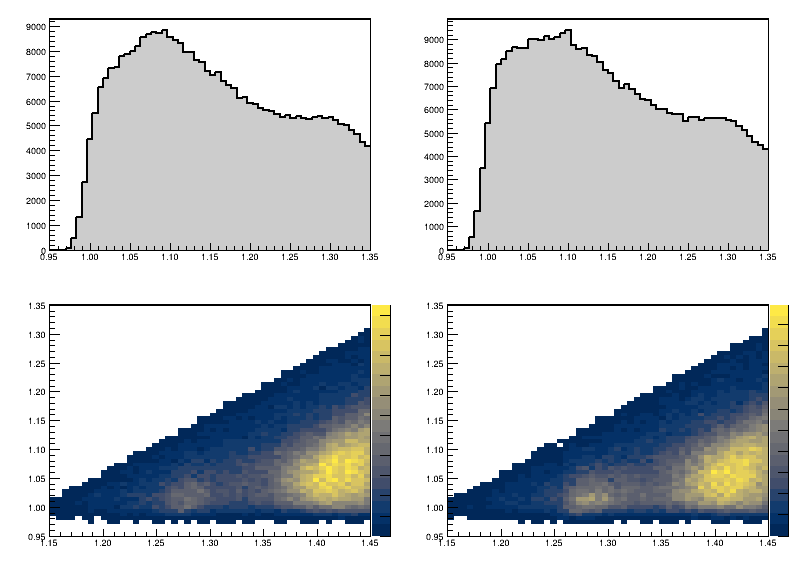

In [7]:
c = ROOT.TCanvas("c","c",800,600)
c.cd()
c.Divide(2,2)
c.cd(1)
hist1d_kk_pipkmks.Draw()
c.cd(2)
hist1d_kk_pimkpks.Draw()
c.cd(3)
hist2d_kk_kkpi_pipkmks.Draw("colz")
c.cd(4)
hist2d_kk_kkpi_pimkpks.Draw("colz")
#TODO set log z for 2D hists
c.Draw()

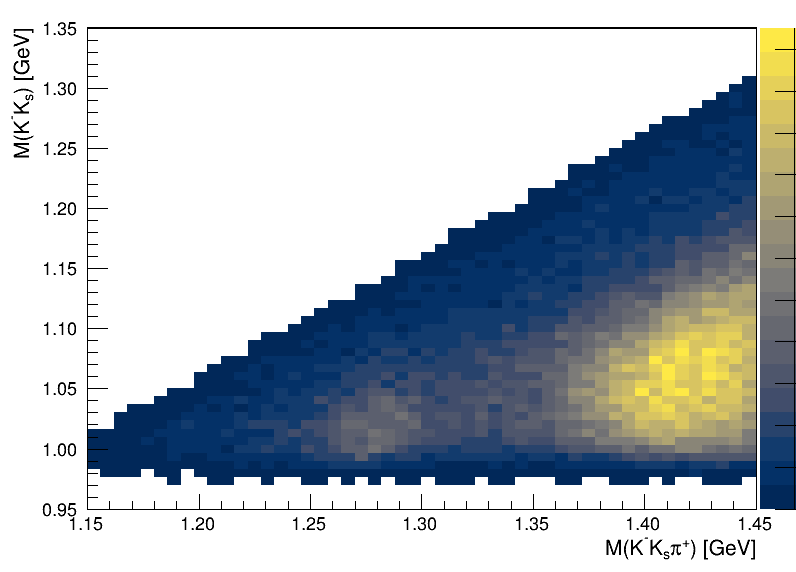

In [8]:
c.Clear()
hist2d_kk_kkpi_pipkmks.GetXaxis().SetTitle('M(K^{-}K_{s}#pi^{+}) [GeV]')
hist2d_kk_kkpi_pipkmks.GetYaxis().SetTitle('M(K^{-}K_{s}) [GeV]')
hist2d_kk_kkpi_pipkmks.Draw("colz")
c.Draw()


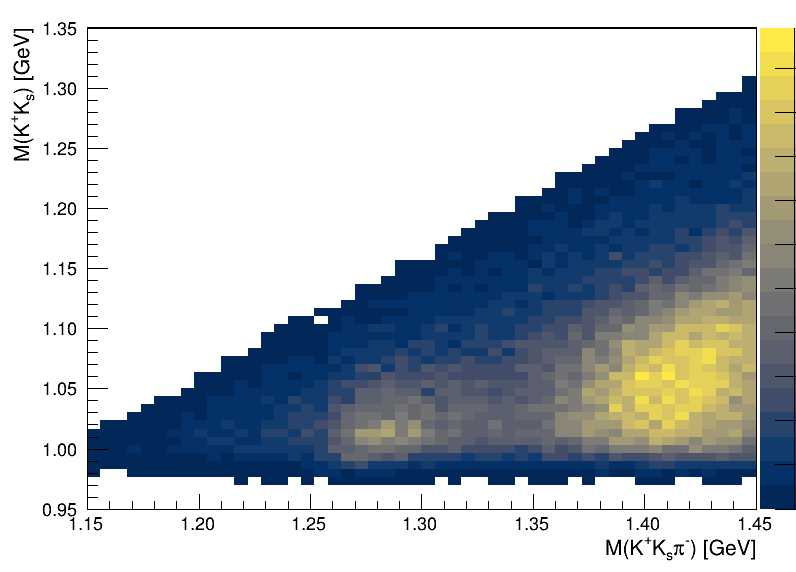

In [9]:
c.Clear()
hist2d_kk_kkpi_pimkpks.GetXaxis().SetTitle('M(K^{+}K_{s}#pi^{-}) [GeV]')
hist2d_kk_kkpi_pimkpks.GetYaxis().SetTitle('M(K^{+}K_{s}) [GeV]')
hist2d_kk_kkpi_pimkpks.Draw("colz")
c.Draw()

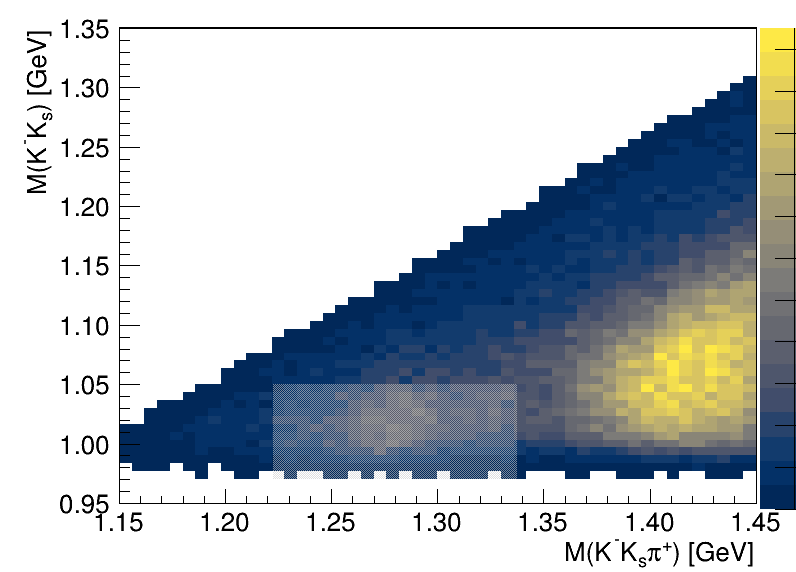

In [14]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
pad.SetBottomMargin(0.12)
hist2d_kk_kkpi_pipkmks.GetXaxis().SetTitle('M(K^{-}K_{s}#pi^{+}) [GeV]')
hist2d_kk_kkpi_pipkmks.GetXaxis().SetTitleSize(0.05)
hist2d_kk_kkpi_pipkmks.GetXaxis().SetLabelSize(0.05)
hist2d_kk_kkpi_pipkmks.GetYaxis().SetTitle('M(K^{-}K_{s}) [GeV]')
hist2d_kk_kkpi_pipkmks.GetYaxis().SetTitleSize(0.05)
hist2d_kk_kkpi_pipkmks.GetYaxis().SetLabelSize(0.05)
hist2d_kk_kkpi_pipkmks.Draw("colz")

x_start = constants.F1_PIPKMKS_VOIGHT_MEAN - 2*constants.F1_PIPKMKS_VOIGHT_WIDTH
x_end = constants.F1_PIPKMKS_VOIGHT_MEAN + 2*constants.F1_PIPKMKS_VOIGHT_WIDTH
a0_box = ROOT.TBox(x_start, 0.97, x_end, 1.05)
# a0_box.SetLineColor(ROOT.kRed)
a0_box.SetFillColorAlpha(ROOT.kGray, 0.6)
a0_box.SetFillStyle(3001)
a0_box.Draw()

c.Draw()

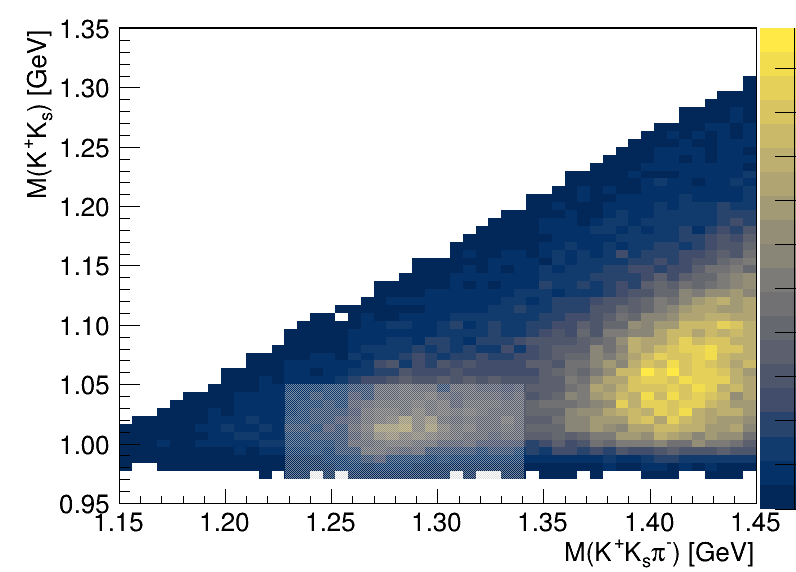

In [15]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
pad.SetBottomMargin(0.12)
hist2d_kk_kkpi_pimkpks.GetXaxis().SetTitle('M(K^{+}K_{s}#pi^{-}) [GeV]')
hist2d_kk_kkpi_pimkpks.GetXaxis().SetTitleSize(0.05)
hist2d_kk_kkpi_pimkpks.GetXaxis().SetLabelSize(0.05)
hist2d_kk_kkpi_pimkpks.GetYaxis().SetTitle('M(K^{+}K_{s}) [GeV]')
hist2d_kk_kkpi_pimkpks.GetYaxis().SetTitleSize(0.05)
hist2d_kk_kkpi_pimkpks.GetYaxis().SetLabelSize(0.05)
hist2d_kk_kkpi_pimkpks.Draw("colz")

x_start = constants.F1_PIMKPKS_VOIGHT_MEAN - 2*constants.F1_PIMKPKS_VOIGHT_WIDTH
x_end = constants.F1_PIMKPKS_VOIGHT_MEAN + 2*constants.F1_PIMKPKS_VOIGHT_WIDTH
a0_box = ROOT.TBox(x_start, 0.97, x_end, 1.05)
# a0_box.SetLineColor(ROOT.kRed)
a0_box.SetFillColorAlpha(ROOT.kGray, 0.6)
a0_box.SetFillStyle(3001)
a0_box.Draw()

c.Draw()

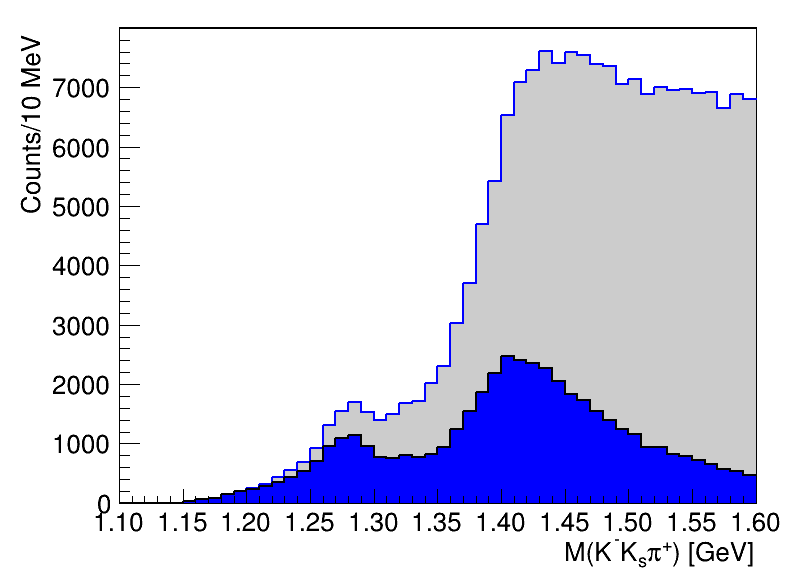

In [20]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
pad.SetBottomMargin(0.12)
hist_kkpi_pipkmks.GetXaxis().SetTitle('M(K^{-}K_{s}#pi^{+}) [GeV]')
hist_kkpi_pipkmks.GetXaxis().SetTitleSize(0.05)
hist_kkpi_pipkmks.GetXaxis().SetLabelSize(0.05)
hist_kkpi_pipkmks.GetYaxis().SetTitle('Counts/10 MeV')
hist_kkpi_pipkmks.GetYaxis().SetTitleSize(0.05)
hist_kkpi_pipkmks.GetYaxis().SetTitleOffset(1.4)
hist_kkpi_pipkmks.GetYaxis().SetLabelSize(0.05)
hist_kkpi_pipkmks.SetLineColor(ROOT.kBlue)
hist_kkpi_a0_pipkmks.SetLineColor(ROOT.kBlack)
hist_kkpi_a0_pipkmks.SetFillColor(ROOT.kBlue)

hist_kkpi_pipkmks.Draw()
hist_kkpi_a0_pipkmks.Draw("same")

c.Draw()
ROOT.gPad.RedrawAxis()


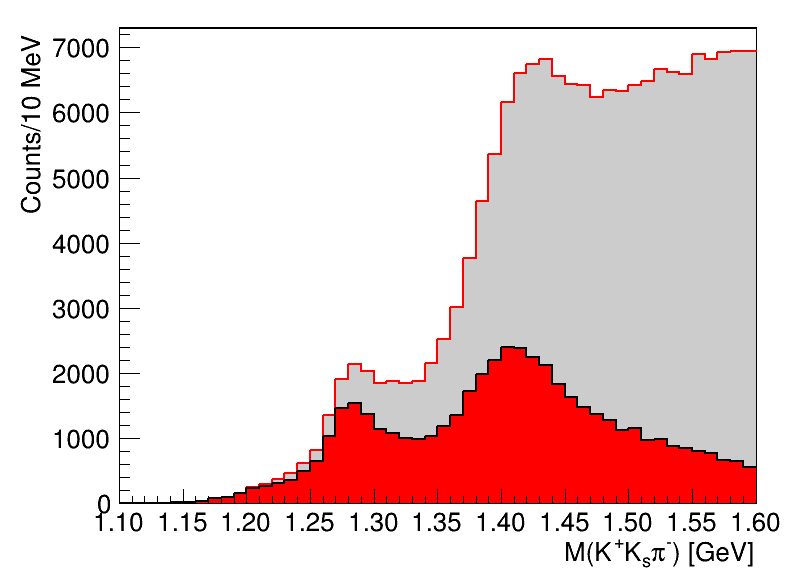

In [21]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
pad.SetBottomMargin(0.12)
hist_kkpi_pimkpks.GetXaxis().SetTitle('M(K^{+}K_{s}#pi^{-}) [GeV]')
hist_kkpi_pimkpks.GetXaxis().SetTitleSize(0.05)
hist_kkpi_pimkpks.GetXaxis().SetLabelSize(0.05)
hist_kkpi_pimkpks.GetYaxis().SetTitle('Counts/10 MeV')
hist_kkpi_pimkpks.GetYaxis().SetTitleSize(0.05)
hist_kkpi_pimkpks.GetYaxis().SetTitleOffset(1.4)
hist_kkpi_pimkpks.GetYaxis().SetLabelSize(0.05)
hist_kkpi_pimkpks.SetLineColor(ROOT.kRed)
hist_kkpi_a0_pimkpks.SetLineColor(ROOT.kBlack)
hist_kkpi_a0_pimkpks.SetFillColor(ROOT.kRed)

hist_kkpi_pimkpks.Draw()
hist_kkpi_a0_pimkpks.Draw("same")

c.Draw()
ROOT.gPad.RedrawAxis()

In [ ]:
# legend = ROOT.TLegend(0.6,0.55,0.9,0.9)
# legend.AddEntry(hist_kkpi_a0_pipkmks,"K^{-}K_{S}#pi^{+} - a_{0}", "l")
# legend.AddEntry(hist_kkpi_a0_pimkpks,"K^{+}K_{S}#pi^{-} - a_{0}", "l")
# legend.AddEntry(hist_kkpi_kstar_pipkmks,"K^{-}K_{S}#pi^{+} - K*", "l")
# legend.AddEntry(hist_kkpi_kstar_pimkpks,"K^{+}K_{S}#pi^{-} - K*", "l")

# c1 = ROOT.TCanvas("c1","c1",800,600)
# c1.cd()
# c1.cd(1)
# hist_kkpi_a0_pipkmks.Draw()
# c1.cd(2)
# hist_kkpi_a0_pimkpks.Draw('same')
# c1.cd(3)
# hist_kkpi_kstar_pipkmks.Draw('same')
# c1.cd(4)
# hist_kkpi_kstar_pimkpks.Draw('same')
# legend.Draw()
# c1.Draw()

In [ ]:
hist1d_kk_pipkmks = df_pipkmks.Filter('pipkmks_m < 1.3').Histo1D(('kkm_pipkmks', 'M(K^{-}K_{S}) GeV', 150, 0.9, 1.5), 'kk_m').GetValue()
hist1d_kk_pimkpks = df_pimkpks.Filter('pimkpks_m < 1.3').Histo1D(('kkm_pimkpks', 'M(K^{+}K_{S}) GeV', 150, 0.9, 1.5), 'kk_m').GetValue()
hist2d_kk_kkpi_pipkmks = df_pipkmks.Filter('pipkmks_m < 1.3').Histo2D(('kk_kkpi_pipkmks', 'M(K^{-}K_{S}) vs M(K^{-}K_S}#pi^{+}) GeV', 70, 1.1, 1.35, 150, 0.9, 1.3), 'pipkmks_m', 'kk_m').GetValue()
hist2d_kk_kkpi_pimkpks = df_pimkpks.Filter('pimkpks_m < 1.3').Histo2D(('kk_kkpi_pimkpks', 'M(K^{+}K_{S}) vs M(K^{+}K_S}#pi^{-}) GeV', 70, 1.1, 1.35, 150, 0.9, 1.3), 'pimkpks_m', 'kk_m').GetValue()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


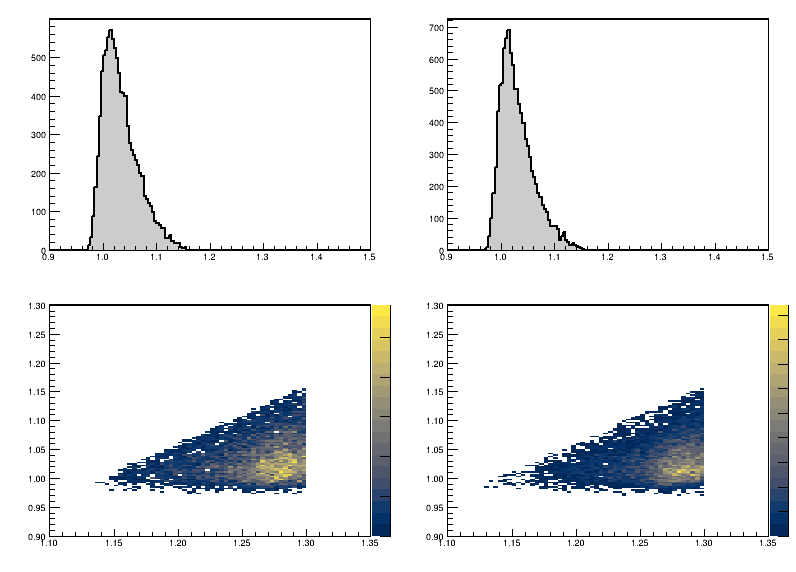

In [ ]:
c = ROOT.TCanvas("c","c",800,600)
c.cd()
c.Divide(2,2)
c.cd(1)
hist1d_kk_pipkmks.Draw()
c.cd(2)
hist1d_kk_pimkpks.Draw()
c.cd(3)
hist2d_kk_kkpi_pipkmks.Draw("colz")
c.cd(4)
hist2d_kk_kkpi_pimkpks.Draw("colz")
c.Draw()

In [ ]:
# TODO: look at phasespace with KK cut < 1.05 